In [1]:
from portfolio_optimization.data_processing import *
from portfolio_optimization.data_collection import *
from datetime import datetime, timezone, timedelta
from tokens.get_assets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, plotting

High risk tickers: 15
Medium risk tickers: 60
Low risk tickers: 8
             aave         ada        avax           btc        cake  \
count  881.000000  881.000000  881.000000    881.000000  881.000000   
mean   181.439261    0.941302   36.839365  35102.610352    9.497321   
std    127.447780    0.653197   29.766962  13606.369164    7.852002   
min     49.297063    0.243946    9.604210  15758.291282    1.343584   
25%     75.615002    0.386749   15.872495  22929.024894    3.778235   
50%    117.631099    0.769256   20.840199  31707.690037    5.825290   
75%    295.945170    1.321948   58.465372  45984.719907   14.300255   
max    627.175036    2.965479  134.992009  67541.755508   42.273682   

              dot          eth        link       matic         sol  \
count  881.000000   881.000000  881.000000  881.000000  881.000000   
mean    17.167077  2292.810139   15.602275    1.110381   61.662283   
std     12.737926   920.595087   10.326771    0.497252   58.679603   
min      4.280

<Axes: xlabel='date'>

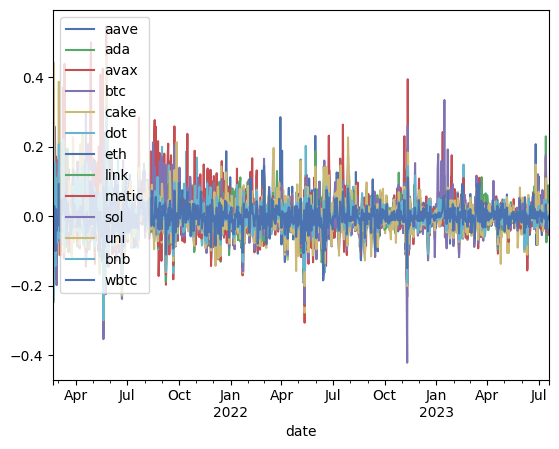

In [2]:
asset_list = get_tickers()
df = get_historical_prices_for_assets(asset_list['high_risk_tickers'])
# Print comprehensive statistical summary
print(df.describe())

# this will give you the percentage change
df_percentage_variation = df.pct_change()

# plot variation of each asset's price
df_percentage_variation.plot()

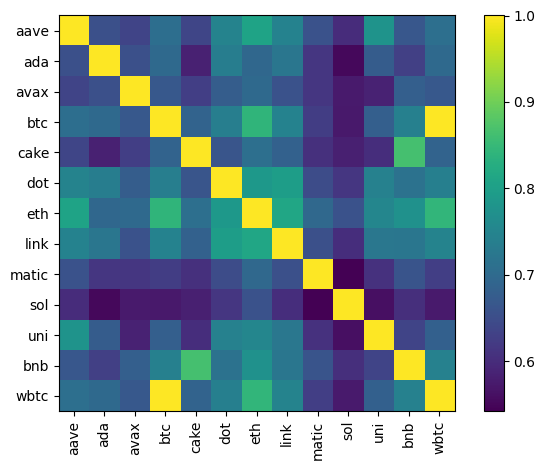

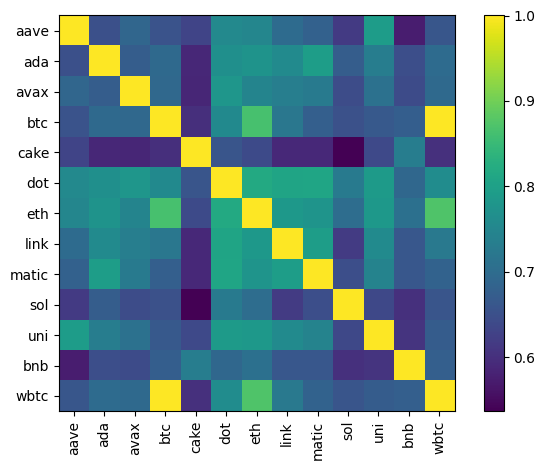

In [3]:
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

In [4]:
rets = expected_returns(df)
rets.tail()

,aave,ada,avax,btc,cake,dot,eth,link,matic,sol,uni,bnb,wbtc
date,,,,,,,,,,,,,
2023-07-16,-0.026166,-0.008205,0.014730,-0.000653,-0.007426,-0.003540,-0.002284,-0.002753,-0.012299,0.026051,-0.008906,0.013656,-0.000554
2023-07-17,-0.026923,-0.033928,-0.036122,-0.001357,-0.022958,-0.021628,-0.003196,-0.043356,-0.036932,-0.000939,-0.012907,-0.032328,-0.001066
2023-07-18,-0.021101,-0.007530,0.009329,-0.003505,0.028434,-0.001936,-0.006370,0.089304,0.012690,-0.018232,0.034099,0.004686,-0.003804
2023-07-19,-0.042012,-0.018456,-0.044670,-0.010218,-0.025269,-0.022891,-0.007785,-0.039419,-0.053164,-0.050761,-0.004085,-0.016682,-0.009499
2023-07-20,-0.003851,0.053785,0.016517,0.002590,0.004108,0.003642,-0.004155,-0.001351,0.010089,0.034707,-0.002700,0.004531,0.001821


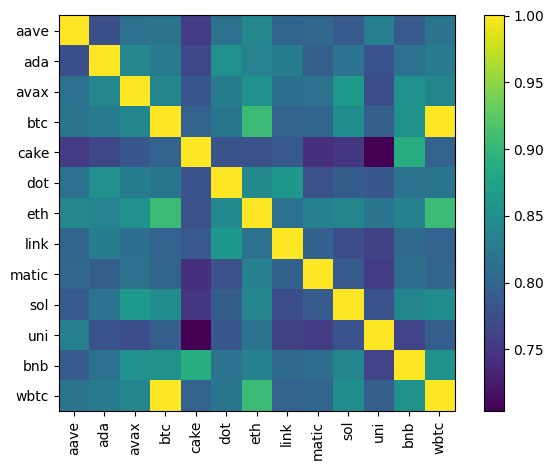

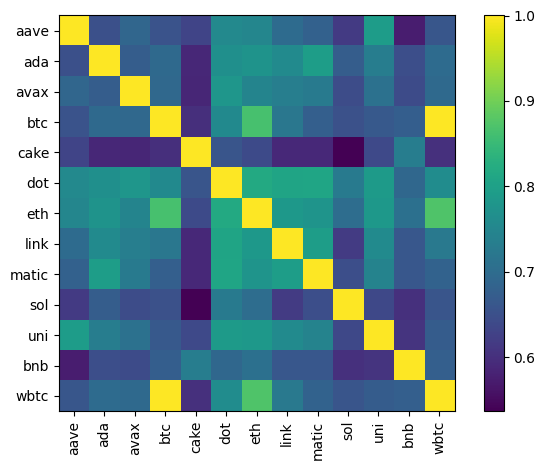

In [5]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

HRP Optimization
================

In [6]:
from pypfopt import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('aave', 0.04624),
             ('ada', 0.12362),
             ('avax', 0.04658),
             ('btc', 0.13128),
             ('cake', 0.05204),
             ('dot', 0.05877),
             ('eth', 0.08439),
             ('link', 0.05501),
             ('matic', 0.03574),
             ('sol', 0.06994),
             ('uni', 0.08579),
             ('bnb', 0.07952),
             ('wbtc', 0.13106)])

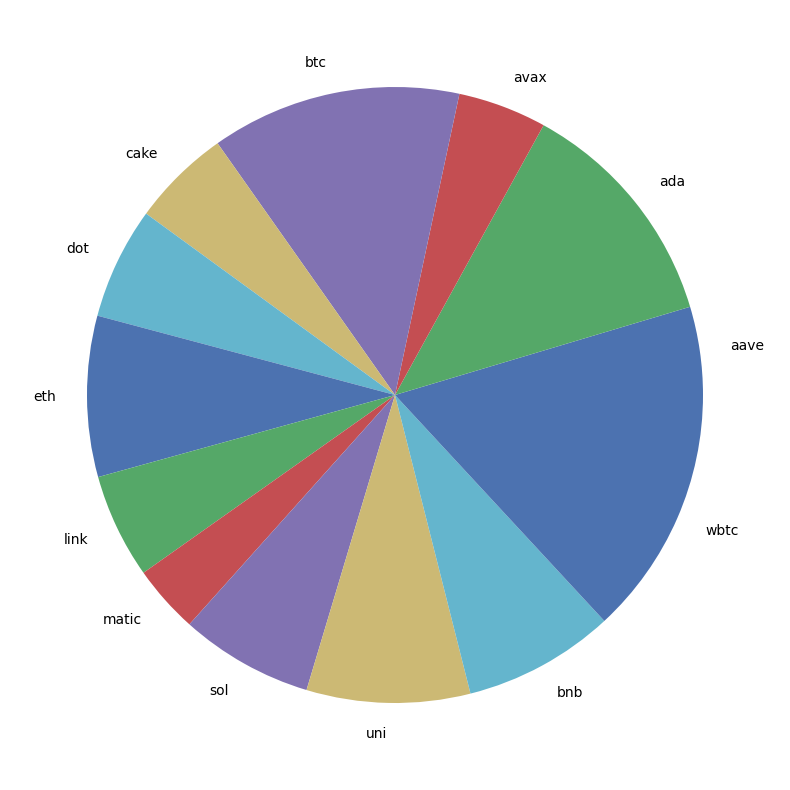

In [7]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [8]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 10.7%
Annual volatility: 66.5%
Sharpe Ratio: 0.13


/Users/arguiot/Developer/Pyratz/portfolio/env/lib/python3.11/site-packages/pypfopt/plotting.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


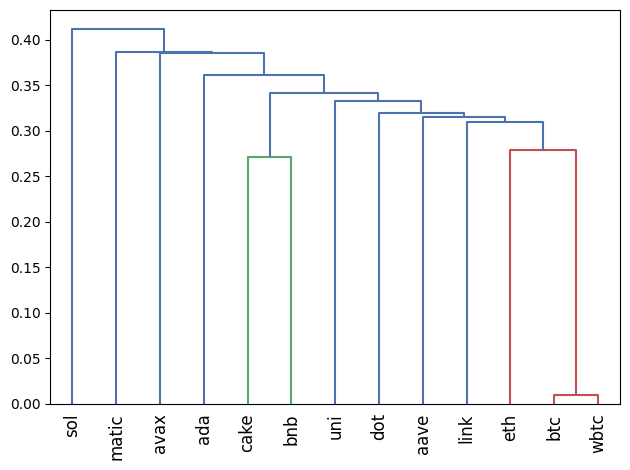

In [9]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp); 